### import libraries ###

In [20]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.compose import ColumnTransformer
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from sklearn.metrics import classification_report
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns


### main function
    The main function below drives the entire code. 
    It prepares the dataset, builds a model with appropriate parameters, evaluates the model and predicts on the test data. Finally, plots some performance metrics.

In [58]:
def main():
    df = pd.read_csv('cover_data.csv')
    # EDA
    EDA(df)
    # Data processing
    X_train, X_test, Y_train, Y_test = dataProcessing(df)
    # Build the model
    # Evaluate the model
    # Visualize and report


In [59]:
if __name__ == '__main__':
    main()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 


### Helper Functions

In [36]:
def EDA(df):
    '''
    Data Exploring and Preprocessing (EDA)
    To find insights to help with Data cleaning/preparation/transformation, which will ultimately be used into a machine learning algorithm. The following steps are followed:
    1. Print headings of the dataset
    2. Print info of dataset
    3. Count class numbers: binary vs multi-class
    '''
    df.head()
    print(df.info())
    print(Counter(df['class']))

In [56]:
def dataProcessing(df):
    '''
    preprocess the datasets by spliting datasets to train and test sets, standardize numerical features, and transfomr multiclass labels to binary vectors
    '''
    features = df.iloc[:,0:-1]
    labels = df.iloc[:,-1]
    # split datasets to train and test
    X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2,random_state=42, stratify=labels )
    # standardize numerical values
    numerical_features = features.select_dtypes(include=['float64','int64'])
    numerical_columns = numerical_features.columns
    ct = ColumnTransformer([("numeric",StandardScaler(),numerical_columns)])
    # apply standardization to training and testing features
    X_train_scaled = ct.fit_transform(X_train)
    X_test_scaled = ct.fit_transform(X_test)

    ## Prepare labels for multi-class classification
    le = LabelEncoder()
    Y_train = le.fit_transform(Y_train.astype(str))
    Y_test = le.transform(Y_test.astype(str))
    # transform labels into a binary vector
    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(Y_test)

    print(X_train_scaled)
    print(Y_train)
    return X_train_scaled, X_test_scaled, Y_train, Y_test


'\nhm = sns.heatmap(df)\nprint(hm)\n'

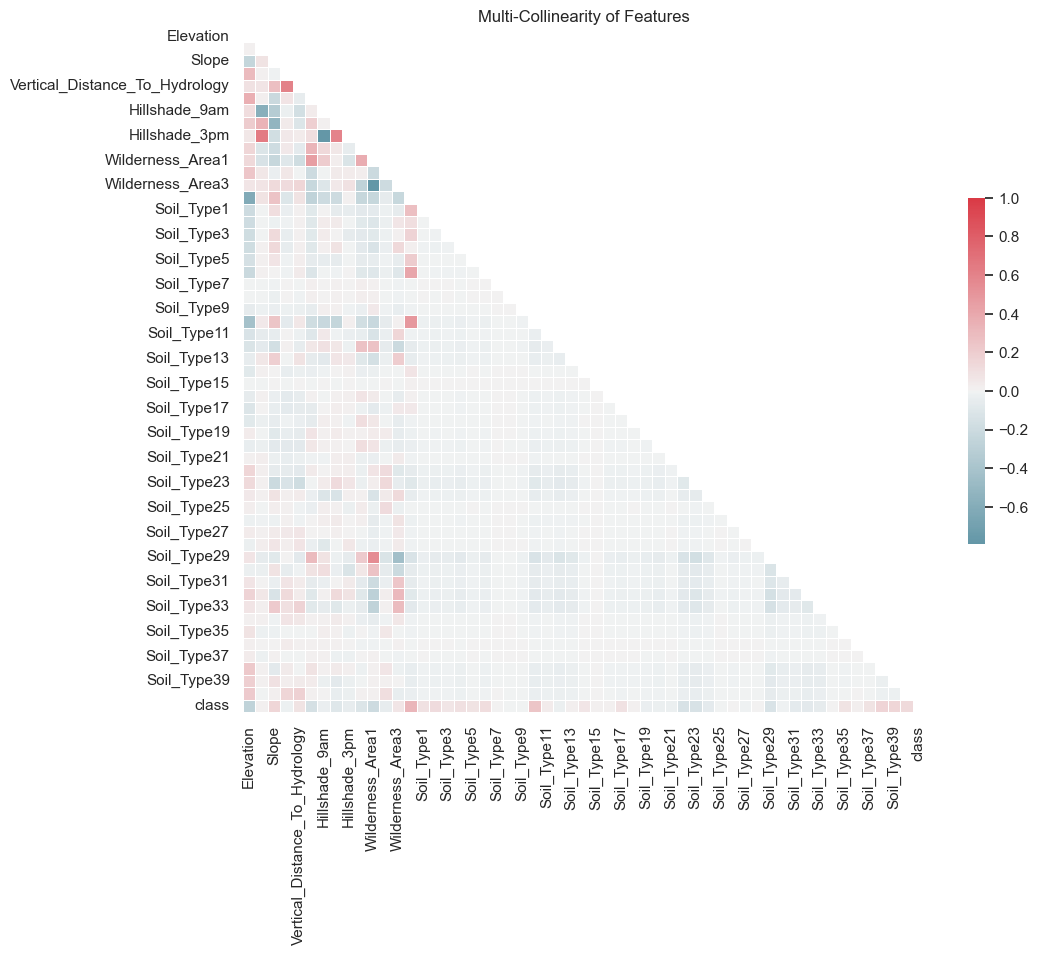

In [22]:


sns.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')

'''
hm = sns.heatmap(df)
print(hm)
'''


From the EDA, we can see from dataset that:

1. features are all numerical, the qualitative features have been converted to binary columns
    Elevation / quantitative /meters / Elevation in meters
    Aspect / quantitative / azimuth / Aspect in degrees azimuth
    Slope / quantitative / degrees / Slope in degrees
    Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features
    Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features
    Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
    Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
    Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer solstice
    Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
    Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
    Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
    Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
    Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation
2. multi class classification: 7 classes